In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('details.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [7]:
print(legal_transaction.shape)
print(fraud_transaction.shape)
data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [9]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [10]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
75074,55886.0,1.289116,-0.054522,0.155643,0.661180,-0.288032,-0.276081,-0.142743,0.003687,0.755701,...,-0.304631,-0.765511,-0.072753,-0.465501,0.513194,0.326501,-0.033532,0.001081,7.16,0
104005,68878.0,1.213147,-0.052185,0.427780,0.790414,-0.404432,-0.282564,-0.104318,-0.094223,0.594912,...,-0.122008,-0.132038,-0.157003,-0.043233,0.624719,0.438151,-0.015429,0.012139,29.61,0
205346,135700.0,-0.957702,0.764171,0.161574,-0.146660,0.494246,-1.050440,1.413475,-0.405919,-0.269402,...,0.113432,0.564357,-0.309912,-0.084536,1.138635,0.106631,-0.179261,-0.112154,103.77,0
282020,170604.0,-1.296329,-0.392009,0.136494,-3.320960,2.743912,3.474976,-0.748112,0.215601,-1.278289,...,0.445991,-1.397216,-0.102414,0.645930,0.392246,-0.600600,0.154532,0.011987,29.90,0
277692,167800.0,0.149639,1.024500,-0.399566,-0.535690,0.871659,-0.856433,0.956674,-0.096137,-0.005090,...,-0.344586,-0.854469,0.098553,0.596417,-0.434163,0.111908,0.220960,0.083794,2.28,0


In [11]:
new_dataset['Class'].value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [12]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96506.555894,0.003967,-0.107191,0.036343,-0.018757,0.033216,-0.017528,0.000019,-0.013534,0.026734,...,0.041094,-0.003127,0.027402,-0.010262,0.009116,-0.001479,0.001528,-0.013191,0.005230,96.663841
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [14]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
75074    55886.0  1.289116 -0.054522  0.155643  0.661180 -0.288032 -0.276081   
104005   68878.0  1.213147 -0.052185  0.427780  0.790414 -0.404432 -0.282564   
205346  135700.0 -0.957702  0.764171  0.161574 -0.146660  0.494246 -1.050440   
282020  170604.0 -1.296329 -0.392009  0.136494 -3.320960  2.743912  3.474976   
277692  167800.0  0.149639  1.024500 -0.399566 -0.535690  0.871659 -0.856433   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1476, 30) (1180, 30) (296, 30)


In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [20]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [21]:
y_pred = model.predict(X_test)
RFC_test_data_accuracy = accuracy_score(Y_test,y_pred)
RFC_precision = precision_score(Y_test, y_pred)
RFC_f1 = f1_score(Y_test, y_pred)
RFC_recall = recall_score(Y_test,y_pred)
classification_rep = classification_report(Y_test, y_pred)


In [22]:
print("Random Forest Classifier : ")
print("Accuracy : ",RFC_test_data_accuracy)
print("Precision : ",RFC_precision)
print("F1 : ",RFC_f1)
print("Recall : ",RFC_recall)
print(f'Classification Report:\n{classification_rep}')

Random Forest Classifier : 
Accuracy :  0.9459459459459459
Precision :  1.0
F1 :  0.9252336448598132
Recall :  0.8608695652173913
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       181
           1       1.00      0.86      0.93       115

    accuracy                           0.95       296
   macro avg       0.96      0.93      0.94       296
weighted avg       0.95      0.95      0.95       296



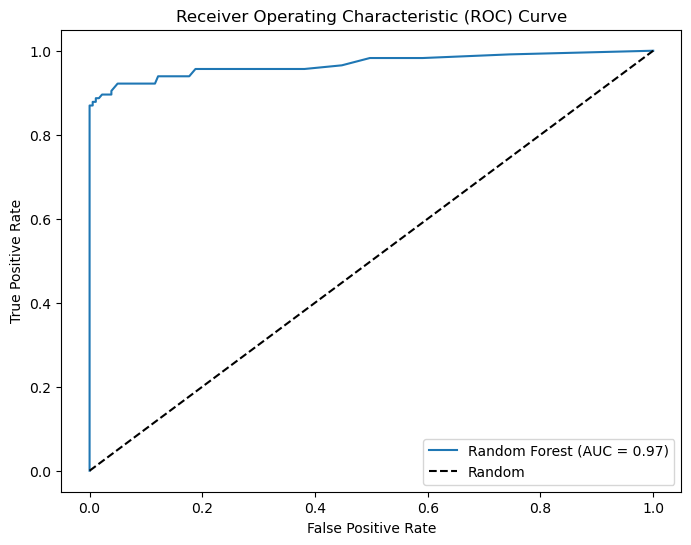

In [23]:

y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc = roc_auc_score(Y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()